In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *

In [ ]:
wina= pd.read_csv('wina.csv', sep = ',', decimal = '.')
wina

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [ ]:
X = wina[wina.columns[:-1]]
y = wina[wina.columns[-1]]

In [ ]:
sc_Stand = StandardScaler()
X = sc_Stand.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Wszystkie zmienne:", gnb.score(X_train, y_train))

Wszystkie zmienne: 0.9758064516129032


In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 22  1]
 [ 0  0 18]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      0.96      0.98        23
           3       0.95      1.00      0.97        18

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



Algorytm GaussianNB poprawnie dobrał klasę wina dla 98% obserwacji.

Trzy składowe:  0.6652996889318523
Pięć składowe:  0.8016229275554786


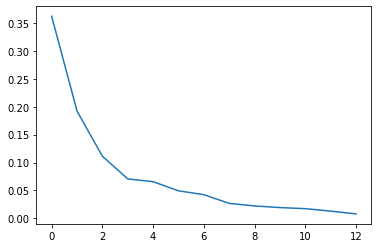

In [ ]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_)

pca = PCA(3).fit(X)
print("Trzy składowe: ", np.sum(pca.explained_variance_ratio_) )

pca = PCA(5).fit(X)
print("Pięć składowe: ", np.sum(pca.explained_variance_ratio_) )

Trzy składowe definiują 66,5% zmienności danych w zbiorze. Pięć składowych definiuje 80,2% zmienności danych w zbiorze. W obu przypadkach liczba wymiarow definiuje ponad 50% zmienności w zbiorze, zatem można podjąć próbę klasyfikacji na takich podziałach składowych.

## Analiza dla trzech składowych

In [ ]:
nowe_zm = 3
ladunki = pca.components_[:nowe_zm].T
skladowe = ["PC"+str(i) for i in range(1, nowe_zm+1)]
wina_df = pd.DataFrame(ladunki, columns = skladowe,
                        index=wina.columns[:-1])
wina_df

,PC1,PC2,PC3
x1,0.144329,-0.483652,-0.207383
x2,-0.245188,-0.224931,0.089013
x3,-0.002051,-0.316069,0.626224
x4,-0.239320,0.010591,0.612080
x5,0.141992,-0.299634,0.130757
x6,0.394661,-0.065040,0.146179
x7,0.422934,0.003360,0.150682
x8,-0.298533,-0.028779,0.170368
x9,0.313429,-0.039302,0.149454
x10,-0.088617,-0.529996,-0.137306


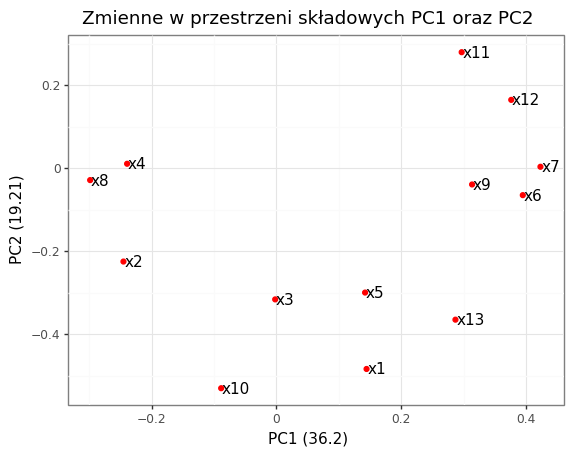

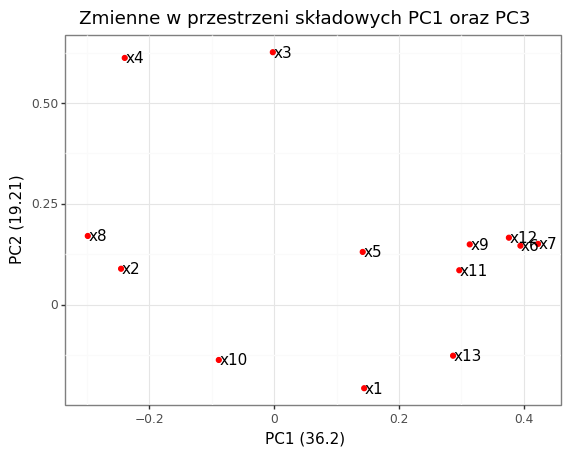

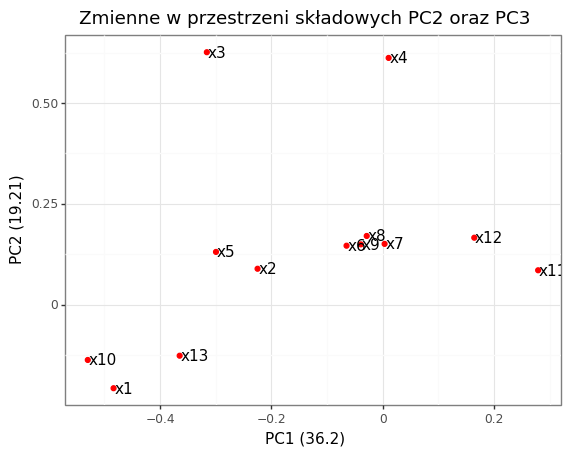

In [ ]:
# PC1, PC2
print(
    (ggplot(wina_df, aes('PC1', 'PC2')) +
 geom_point(color = "red") +
 theme_bw() +
 geom_text(label = wina_df.index, ha='left', nudge_x = 0.001) +
 labs(x = f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)})',
     y = f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)})',
     title = 'Zmienne w przestrzeni składowych PC1 oraz PC2')
))
# PC1, PC3
print(
(ggplot(wina_df, aes('PC1', 'PC3')) +
 geom_point(color = "red") +
 theme_bw() +
 geom_text(label = wina_df.index, ha='left', nudge_x = 0.001) +
 labs(x = f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)})',
     y = f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)})',
     title = 'Zmienne w przestrzeni składowych PC1 oraz PC3')
))
# PC2, PC3
print(
(ggplot(wina_df, aes('PC2', 'PC3')) +
 geom_point(color = "red") +
 theme_bw() +
 geom_text(label = wina_df.index, ha='left', nudge_x = 0.001) +
 labs(x = f'PC1 ({round(pca.explained_variance_ratio_[0]*100, 2)})',
     y = f'PC2 ({round(pca.explained_variance_ratio_[1]*100, 2)})',
     title = 'Zmienne w przestrzeni składowych PC2 oraz PC3')
))

In [ ]:
X_PCA = pca.transform(X)
X_PCA_3 = X_PCA[:,0:3]

In [ ]:
X_PCA_3_train, X_PCA_3_test, y_PCA_3_train, y_PCA_3_test = train_test_split(X_PCA_3, y, test_size=0.30)

In [ ]:
gnb_3 = GaussianNB()
gnb_3.fit(X_PCA_3_train, y_PCA_3_train)

GaussianNB()

In [ ]:
print("Trzy składowe:", gnb_3.score(X_PCA_3_train, y_PCA_3_train))

Trzy składowe: 0.9919354838709677


In [ ]:
y_PCA_3_pred = gnb_3.predict(X_PCA_3_test)

In [ ]:
print(confusion_matrix(y_PCA_3_test, y_PCA_3_pred))
print(classification_report(y_PCA_3_test, y_PCA_3_pred))

[[18  1  0]
 [ 1 20  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      0.91      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



Po redukcji liczby wymiarów do trzech nowych składowych algorytm GaussianNB poprawnie dobrał klasę wina dla 94% obserwacji.

## Analiza dla pięciu składowych

In [ ]:
nowe_zm = 5
ladunki = pca.components_[:nowe_zm].T
skladowe = ["PC"+str(i) for i in range(1, nowe_zm+1)]
wina_df = pd.DataFrame(ladunki, columns = skladowe,
                        index=wina.columns[:-1])
wina_df

,PC1,PC2,PC3,PC4,PC5
x1,0.144329,-0.483652,-0.207383,-0.017856,-0.265664
x2,-0.245188,-0.224931,0.089013,0.536890,0.035214
x3,-0.002051,-0.316069,0.626224,-0.214176,-0.143025
x4,-0.239320,0.010591,0.612080,0.060859,0.066103
x5,0.141992,-0.299634,0.130757,-0.351797,0.727049
x6,0.394661,-0.065040,0.146179,0.198068,-0.149318
x7,0.422934,0.003360,0.150682,0.152295,-0.109026
x8,-0.298533,-0.028779,0.170368,-0.203301,-0.500703
x9,0.313429,-0.039302,0.149454,0.399057,0.136860
x10,-0.088617,-0.529996,-0.137306,0.065926,-0.076437


In [ ]:
# 5 składowych
X_PCA = pca.transform(X)
X_PCA_5 = X_PCA[:,0:5]
X_PCA_5_train, X_PCA_5_test, y_PCA_5_train, y_PCA_5_test = train_test_split(X_PCA_5, y, test_size=0.30)
gnb_5 = GaussianNB()
gnb_5.fit(X_PCA_5_train, y_PCA_5_train)
print("Pięć składowe:", gnb_5.score(X_PCA_5_train, y_PCA_5_train))
y_PCA_5_pred = gnb_5.predict(X_PCA_5_test)
print(confusion_matrix(y_PCA_5_test, y_PCA_5_pred))
print(classification_report(y_PCA_5_test, y_PCA_5_pred))

Pięć składowe: 0.9838709677419355
[[21  0  0]
 [ 0 13  0]
 [ 0  0 20]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        20

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Po redukcji liczby wymiarów do pięciu nowych składowych algorytm GaussianNB poprawnie dobrał klasę wina dla 100% obserwacji. W tym przypadku klasyfikator zadziałał lepiej niż ten dla postawowej liczby wymiarów, nie oznacza to jednak, że 5 wymiarów definiuje lepiej zbiór danych niż podstawowe 13 wymiorów. Spowodowane jest to stosunkowo małą liczbą obserwacji w zbiorze danych oraz losowym dobieraniem danych uczących.
